In [177]:
import os

In [178]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.fft as fft
import scipy.integrate as integrate

plt.style.use('ggplot')

In [179]:
rdf = pd.read_csv(r'data\\2022-09-25_velocity_scaling_HV_2e-5_T_01e-4\\rdf_T_1.30085_P_1.46841_HV_0.00002_.csv', sep=';')
rdf

,radius,rdf
0,0.01,0.000000
1,0.02,0.000000
2,0.03,0.000000
3,0.04,0.000000
4,0.05,0.000000
...,...,...
606,6.07,1.000432
607,6.08,1.000061
608,6.09,0.999775
609,6.10,1.000417


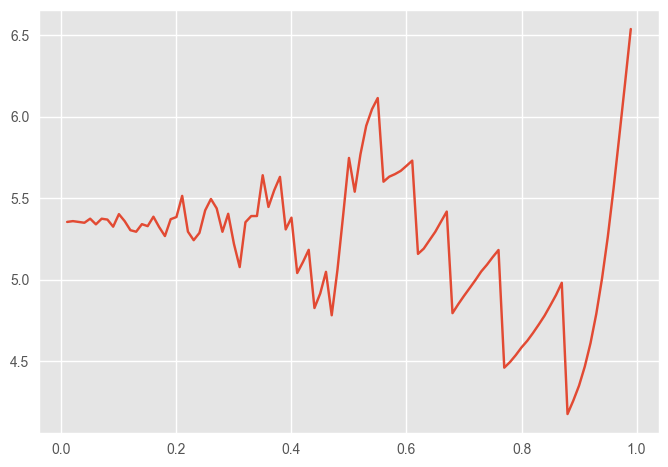

In [180]:
rng = np.arange(1, 100)
sums = [rdf.rdf[::i].sum() for i in rng]
dr = 0.01 * rng
plt.plot(dr, dr * sums)
plt.show()

(0.85, 1.08, 1.59) (0.2300000000000001, 0.51)


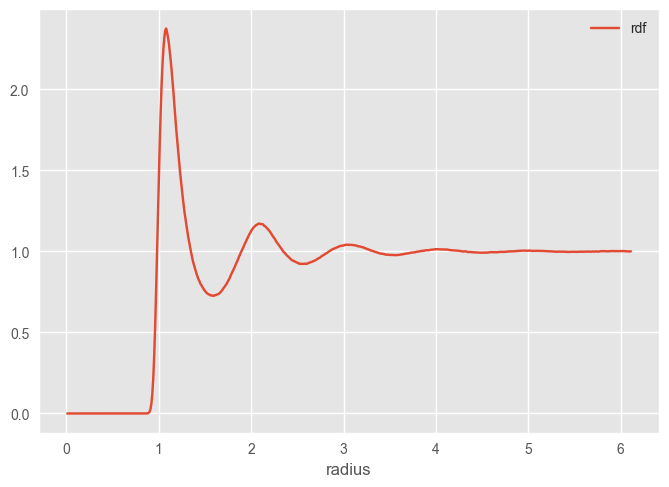

In [248]:
_rdf = rdf[::1].reset_index(drop=True)
_rdf.plot(x='radius', y='rdf')
argmax = _rdf.rdf.argmax()
argmin = _rdf.loc[_rdf.index > argmax].rdf.argmin()
first = _rdf[_rdf.rdf > 0].index[0]
a = _rdf.radius[first]
b = _rdf.radius[argmax]
c = b + _rdf.radius[argmin]
print((a, b, c), (b - a, c - b))
plt.show()

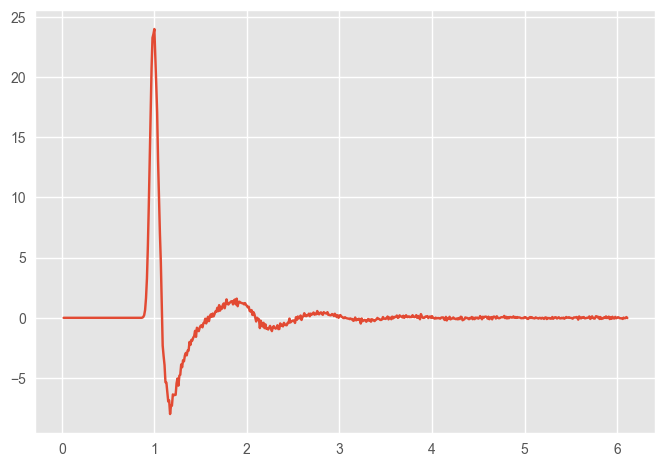

0.16999999999999993

In [246]:
r_dg = rdf.radius[1:].values
dg = (rdf.rdf.values[1:] - rdf.rdf.values[:-1])
plt.plot(r_dg, dg / 0.01)
plt.show()
r_dg[dg.argmin()] - r_dg[dg.argmax()]

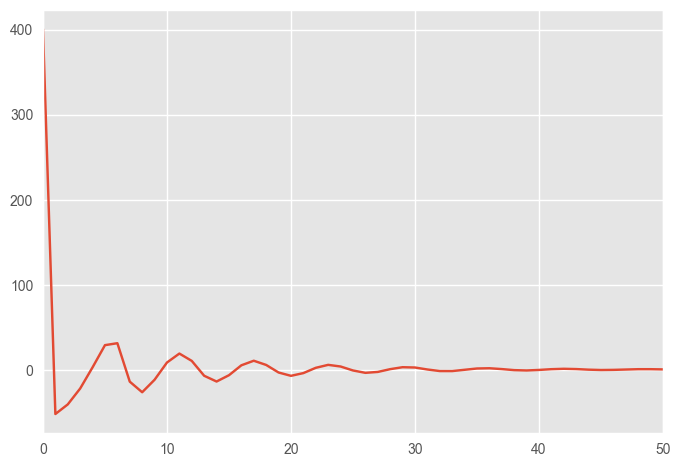

(0, 1, 5)

In [183]:
rho = (4 * (7 / 12.25) ** 3)
s = 1 + rho * fft.rfft(rdf.rdf.values).real
plt.plot(s)
plt.xlim(left=0, right=50)
plt.show()
s.argmax(), s.argmin(), s[1:].argmax()

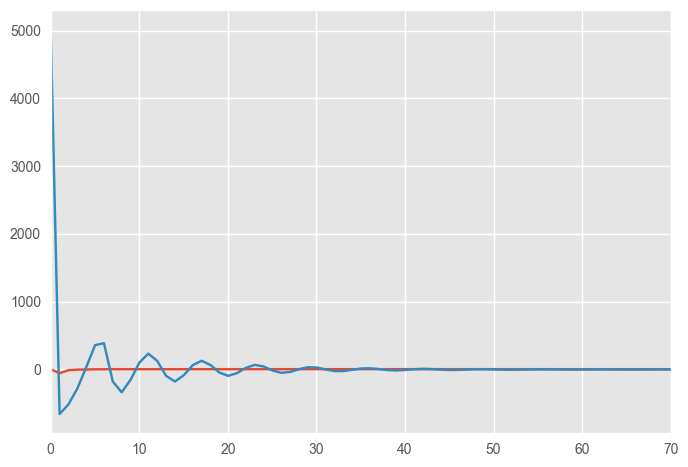

In [60]:
structure_factor = pd.DataFrame({'k': np.linspace(0, 611, 611)})
structure_factor['sum1'] = structure_factor['k'].apply(
    lambda k: (rdf.radius * (rdf.rdf - 0) * 0.01 * np.sin(k * rdf.radius) / k).sum()
)
structure_factor['S1'] = 1 + 4 * np.pi * (4 * (7 / 12.25) ** 3) * structure_factor['sum1']
plt.plot(structure_factor.k, structure_factor.S1)
plt.plot(structure_factor.k, 1 + 4 * np.pi * (4 * (7 / 12.25) ** 3) * fft.fft(rdf.rdf.values).real)
plt.xlim(left=0, right=70)
plt.show()

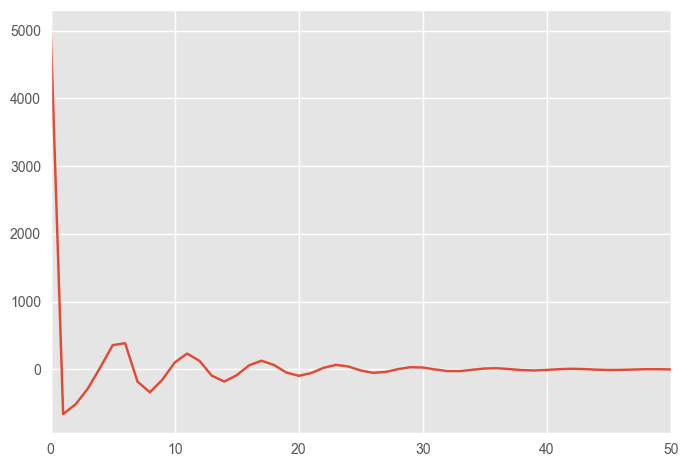

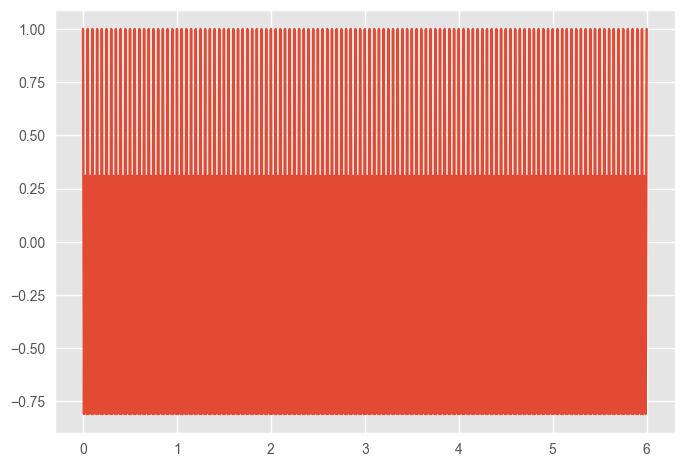

In [111]:
t = np.linspace(0, 6, 601)
s = np.cos(2 * np.pi * 240 * t)
plt.plot(t, s)
plt.show()

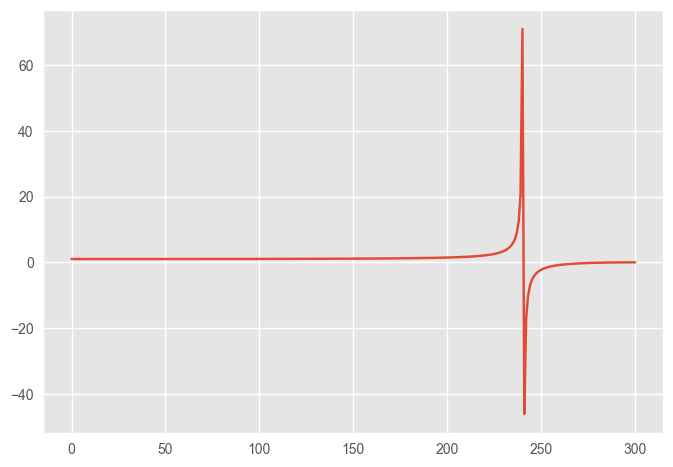

In [112]:
plt.plot(fft.rfft(s))
plt.show()